In [1]:
import tensorflow as tf

In [2]:
from tensorflow import keras
import pylab as pl
import numpy as np
np.random.seed(123)

# 1 Getting the data: standard handwritten digit recognition task

In [3]:
(train_input, train_labels), (test_input, test_labels) = keras.datasets.mnist.load_data()

# 2 understand the input data

# task 1: print the shape of the train input and train labels


In [4]:
train_input.shape, train_labels.shape


((60000, 28, 28), (60000,))


# task 2: print the label of the 10th observation


In [5]:
train_labels[9]

4

# task 3: what is the shape of train_input 1?


In [6]:
train_input[1].shape

(28, 28)

# task 4: plot train_input 1


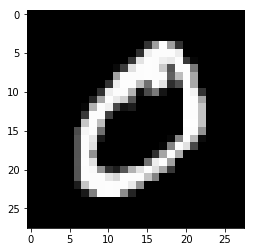

In [7]:
pl.imshow(train_input[1], cmap='gray')

Figure 1. The first element in train_input. It's a 2D image.

# 3 Create the model

# task 5: create a model with 3 layers: input layer and 2 fully connected layers with 128 and 10 neurons respectively

In [10]:
Nh1 = 128
Nout = 10
model = keras.Sequential([keras.layers.Flatten(data_format='channels_first'),
                          keras.layers.Dense(Nh1, activation=tf.nn.sigmoid), 
                          keras.layers.Dense(Nout, activation=tf.nn.softmax) ])


# 4 set the hyperparameters
# task 6: set a learning rate of 0.01, a loss function "sparse_categorical_crossentropy" and set the metric to "accuracy
                                              

In [0]:
model.compile?

In [12]:
model.compile(optimizer=keras.optimizers.SGD(lr=0.01),
              loss=keras.losses.sparse_categorical_crossentropy, 
              metrics=['accuracy'])

In [13]:
X = train_input / 256.
#X = X.reshape(60000, Nh0)

model.fit(X, train_labels, epochs=5)

Epoch 1/5
60000/60000 [==============================] - 11s 184us/sample - loss: 1.4324 - acc: 0.6929
Epoch 2/5
60000/60000 [==============================] - 10s 173us/sample - loss: 0.7015 - acc: 0.8451
Epoch 3/5
60000/60000 [==============================] - 11s 177us/sample - loss: 0.5246 - acc: 0.8718
Epoch 4/5
60000/60000 [==============================] - 11s 179us/sample - loss: 0.4496 - acc: 0.8840 - loss: 0.4501 - acc: 0
Epoch 5/5
60000/60000 [==============================] - 11s 187us/sample - loss: 0.4077 - acc: 0.8908


# Task 7: evaluate the model

In [14]:
test_loss, test_acc = model.evaluate(test_input/256., test_labels)

10000/10000 [==============================] - 1s 85us/sample - loss: 0.3747 - acc: 0.8990


The model achieves an accuracy score 0.899 on test set, which is close to the score on train set. The model is not overfitting.

# task 8 plot the 10'th test observation and its label and prediction

In [15]:
X_test = test_input/256.
pred_matrix = model.predict(X_test)
pred = np.argmax(pred_matrix, axis=1)

In [16]:
# label and prediction of 10th test observation
print('The label of 10th test observation is {}.'.format(test_labels[9]) )
print('The prediction of 10th test observation is {}.'.format( pred[9] ))


The label of 10th test observation is 9.
The prediction of 10th test observation is 9.


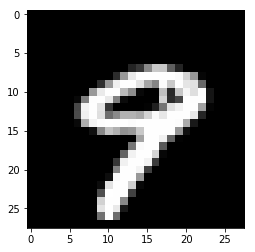

In [17]:
pl.imshow(X_test[9], cmap='gray')


Figure 2. The 10th test sample, the prediction is the same as the label.

# task 9: find the first wrong prediction in the test set

In [18]:
test_labels

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

In [19]:
pred

array([7, 2, 1, ..., 4, 5, 6])

In [20]:
# find the first wrong prediction 

np.where( (test_labels - pred)!=0 )[0][0]

8

The index of the first wrong prediction is 8.

In [21]:
test_labels[8], pred[8]

(5, 6)

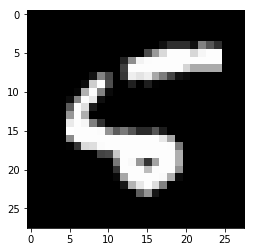

In [22]:
pl.imshow(test_input[8], cmap='gray')

Figure 3. The first wrong prediction. The prediction is 6 but labeled as 5.

# task 10: create a more complex model by adding 3 fully connected layers (you choose the size). Retrain and test the accuracy of prediction and discuss if the model is overfitting

In [35]:
Nh1 = 128
Nh2 = 64
Nh3 = 32
Nh4 = 16
Nout = 10

model_5layer = keras.Sequential([keras.layers.Flatten(data_format='channels_first'),
                          keras.layers.Dense(Nh1, activation=tf.nn.sigmoid), 
                          keras.layers.Dense(Nh2, activation=tf.nn.sigmoid),
                          keras.layers.Dense(Nh3, activation=tf.nn.sigmoid),
                          keras.layers.Dense(Nh4, activation=tf.nn.sigmoid),
                          keras.layers.Dense(Nout, activation=tf.nn.softmax)], )


In [36]:
model_5layer.compile(optimizer=keras.optimizers.SGD(lr=0.2),
              loss=keras.losses.sparse_categorical_crossentropy, 
              metrics=['accuracy'])


In [37]:
X = train_input / 256.
#X = X.reshape(60000, Nh0)

model_5layer.fit(X, train_labels, epochs=5)


Epoch 1/5
60000/60000 [==============================] - 13s 213us/sample - loss: 2.0482 - acc: 0.2285
Epoch 2/5
60000/60000 [==============================] - 15s 244us/sample - loss: 0.7361 - acc: 0.7659
Epoch 3/5
60000/60000 [==============================] - 15s 247us/sample - loss: 0.3866 - acc: 0.8950
Epoch 4/5
60000/60000 [==============================] - 13s 220us/sample - loss: 0.2552 - acc: 0.9283
Epoch 5/5
60000/60000 [==============================] - 14s 228us/sample - loss: 0.1890 - acc: 0.9465


In [38]:
model_5layer.evaluate(test_input/256., test_labels)

10000/10000 [==============================] - 1s 124us/sample - loss: 0.1660 - acc: 0.9544


[0.16595017320215702, 0.9544]

The 5-layer model got a better accuracy on both the training set and test set, it's not overfitting.

<span style="color:red">**-2 pts: more layers require more epoachs to converge, 5 is not enough, you should make a epoach vs test accuracy plot to observe a overfitting, in your case, the only conclusion we can make is until 5th epoach, there is no overfitting yet**</span>